In [10]:
from models import *
from utils import *
import torch
import torchinfo
import torchvision

%reload_ext autoreload
%autoreload 2

In [11]:
# load dataset
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, pin_memory=True)
model_name = 'AE_2'
weights_dir = 'weights/MNIST'
history_dir = 'histories/MNIST'

os.makedirs(weights_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

model = BasicAutoencoder((1, 28, 28), 32, [512, 256]).to(device)
torchinfo.summary(model, input_size=(1, 1, 28, 28))

opt = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.MSELoss()

history = train(model, device, train_loader, val_loader, opt, loss_fn, 50, model_name, weights_dir)
history.to_csv(os.path.join(history_dir, f'{model_name}.history.csv'))


Epoch 1: Train loss: 0.032175, Validation loss: 0.016512170457839967
Epoch 2: Train loss: 0.013534, Validation loss: 0.011279034592211247
Epoch 3: Train loss: 0.010214, Validation loss: 0.0090189962759614
Epoch 4: Train loss: 0.008596, Validation loss: 0.008122793281823396
Epoch 5: Train loss: 0.007623, Validation loss: 0.007320707329362631
Epoch 6: Train loss: 0.006959, Validation loss: 0.006938002374023199
Epoch 7: Train loss: 0.006468, Validation loss: 0.0064197841852903365
Epoch 8: Train loss: 0.006099, Validation loss: 0.0061273880898952485
Epoch 9: Train loss: 0.005785, Validation loss: 0.005921582712978124
Epoch 10: Train loss: 0.005555, Validation loss: 0.00566737767085433
Epoch 11: Train loss: 0.005361, Validation loss: 0.005653640735521912
Epoch 12: Train loss: 0.005200, Validation loss: 0.005402700685709715
Epoch 13: Train loss: 0.005047, Validation loss: 0.005319653224945068
Epoch 14: Train loss: 0.004914, Validation loss: 0.005153503058105707
Epoch 15: Train loss: 0.004798

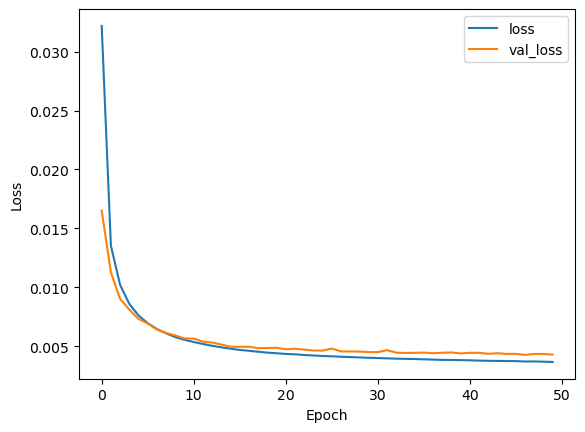

In [13]:
plot_history(model_name, history_dir)

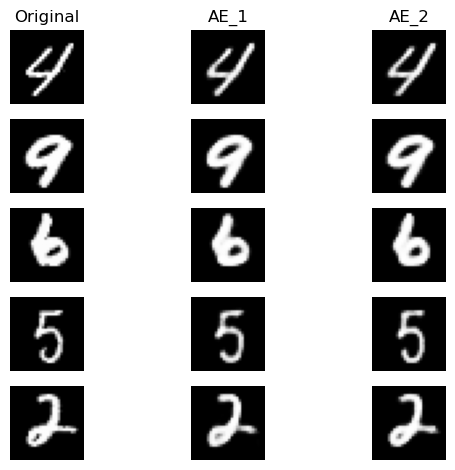

In [14]:
test_batch = next(iter(val_loader))[0][:5]
models = load_models('AE_1', model_name, kind='best', model_dir=weights_dir)
show_examples(test_batch, models)